<div style="text-align: center;">
   <h1>Réduire la marge de performance entre les données d'entraînement et les données de test grâce à des techniques de régularisation. </h1>
</div>

## Importation des bibliothèques nécessaires

Le code importe plusieurs bibliothèques pour la manipulation de données et la création de modèles de régression et de classification :

- **`numpy`** et **`pandas`** : Utilisées pour la manipulation et l'analyse des données.
- **`train_test_split`** : Permet de diviser les données en ensembles d'entraînement et de test.
- **`LinearRegression`, `Lasso`, `Ridge`, `ElasticNet`** : Modèles de régression linéaire avec différentes régularisations (L1 pour Lasso, L2 pour Ridge, ou combinaison des deux pour ElasticNet).
- **`r2_score`** et **`mean_squared_error`** : Utilisées pour évaluer la performance des modèles de régression à l'aide du coefficient \(R^2\) et de l'erreur quadratique moyenne.
- **`LassoCV`, `RidgeCV`, `ElasticNetCV`** : Modèles de régression avec validation croisée pour trouver les meilleurs paramètres de régularisation.
- **`StandardScaler`** : Permet de normaliser les données avant de les passer à certains modèles, particulièrement important lors de l'utilisation de régularisation.
- **`LogisticRegression`, `LogisticRegressionCV`** : Modèles de régression logistique pour les tâches de classification binaire, avec ou sans validation croisée.
- **`accuracy_score`, `confusion_matrix`, `ConfusionMatrixDisplay`** : Métriques et outils pour évaluer la performance des modèles de classification, notamment en calculant la précision, le rapport de classification et la matrice de confusion.

Ces bibliothèques permettent d'implémenter, d'évaluer et de visualiser les modèles de régression et de classification pour des tâches prédictives.


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, auc
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix ,  ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Define the file path to the dataset 📂
file_path = "Mohamed Belannab - efficacite_energetique_Dataset.csv"

# Create an empty DataFrame to store the data 🗂️
df = pd.DataFrame()

# Variable to store the original shape of the dataset (rows, columns) 📏
original_shape = None

### Fonction `load_data()` 📂

Cette fonction charge un dataset à partir d'un fichier CSV et affiche quelques informations clés :

1. **Charge les données** dans un DataFrame (`df`).
2. **Affiche la forme** du dataset (nombre de lignes et de colonnes).
3. **Liste les colonnes** présentes dans le dataset.
4. **Affiche le nombre de valeurs manquantes** dans le dataset.

Elle permet de préparer les données pour une analyse plus approfondie.


In [48]:
def load_data():
    global df, original_shape 
    print("Step 1: Chargement et examen des données...🚀") 
    
    # Charger le dataset à partir du chemin de fichier spécifié 📂
    df = pd.read_csv(file_path)
    
    # Stocker la forme originale du dataset (lignes, colonnes) 📏
    original_shape = df.shape
    
    # Afficher la forme du dataset 📊
    print(f"Shape: {df.shape}")
    
    # Afficher les noms des colonnes du dataset 🗂️
    print("\nColonnes:", df.columns.tolist())
    
    # Afficher le nombre total de valeurs manquantes dans le dataset ❓
    print("\nValeurs manquantes:\n", df.isnull().sum().sum())
    
# Appeler la fonction pour charger et examiner les données 📥
load_data()

# Afficher le DataFrame chargé 🖥️
df

Step 1: Chargement et examen des données...🚀
Shape: (200, 24)

Colonnes: ['Wall_Area', 'Roof_Area', 'Window_Area', 'Overall_Height', 'Outdoor_Temperature', 'Humidity', 'Energy_Efficiency_Rating', 'Noise_Feature_1', 'Noise_Feature_2', 'Noise_Feature_3', 'Noise_Feature_4', 'Noise_Feature_5', 'Noise_Feature_6', 'Noise_Feature_7', 'Noise_Feature_8', 'Noise_Feature_9', 'Noise_Feature_10', 'Orientation_East', 'Orientation_North', 'Orientation_South', 'Orientation_West', 'Glazing_Type_Type_A', 'Glazing_Type_Type_B', 'Glazing_Type_Type_C']

Valeurs manquantes:
 0


,Wall_Area,Roof_Area,Window_Area,Overall_Height,Outdoor_Temperature,Humidity,Energy_Efficiency_Rating,Noise_Feature_1,Noise_Feature_2,Noise_Feature_3,...,Noise_Feature_8,Noise_Feature_9,Noise_Feature_10,Orientation_East,Orientation_North,Orientation_South,Orientation_West,Glazing_Type_Type_A,Glazing_Type_Type_B,Glazing_Type_Type_C
0,388.202617,188.924545,44.013461,3.449571,13.102177,51.125928,166.376703,0.989088,0.904051,0.791454,...,0.067229,0.288525,0.518964,0,1,0,0,0,1,0
1,320.007860,192.818625,38.841030,5.417319,14.283884,53.690759,148.002019,0.818101,0.035220,0.623867,...,0.035538,0.571153,0.052572,1,0,0,0,0,0,1
2,348.936899,232.989788,57.666632,4.055632,8.869296,48.129687,173.574835,0.340605,0.180661,0.439745,...,0.420259,0.914694,0.682054,0,0,1,0,0,0,1
3,412.044660,219.657912,53.562928,5.238103,9.242672,50.771139,195.742252,0.152047,0.338514,0.010586,...,0.896694,0.738639,0.268888,0,0,1,0,0,1,0
4,393.377900,219.203946,32.314615,3.594037,13.584071,79.116164,168.598360,0.784059,0.577496,0.964928,...,0.277569,0.856666,0.106768,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,291.422683,177.155234,53.792355,4.101058,17.079294,51.244361,132.353928,0.025232,0.801273,0.406946,...,0.026990,0.242044,0.173265,0,1,0,0,0,0,1
196,338.589528,225.737718,45.299671,5.074586,9.948149,47.209962,152.130689,0.271550,0.050291,0.044510,...,0.311465,0.200824,0.219634,0,0,0,1,1,0,0
197,341.175208,234.233056,47.832685,3.922901,13.839862,74.568291,162.668388,0.461853,0.420910,0.247839,...,0.474453,0.503322,0.867694,0,1,0,0,1,0,0
198,408.161797,243.997362,40.698435,4.575337,18.195244,50.259791,188.500680,0.726243,0.256975,0.192881,...,0.909741,0.018993,0.336961,0,0,0,1,0,1,0


### Fonction `check_data_quality()` 🔍

Cette fonction évalue la qualité des données dans le DataFrame `df` :

1. **Doublons** : Compte et affiche les lignes dupliquées, s'il y en a.
2. **Valeurs manquantes** : Compte et affiche le nombre et le pourcentage de valeurs manquantes par colonne.
3. **Conclusion** : Si aucune donnée manquante n'est trouvée, un message confirme la qualité des données.

Elle permet de **détecter et afficher les doublons et valeurs manquantes** afin de préparer les données pour l'analyse.


In [49]:
def check_data_quality():
    global df  
    
    print("\nStep 2: Vérification de la qualité des données...🚀")  
    
    # Vérifier les lignes dupliquées dans le dataset 🔄
    duplicates = df.duplicated().sum()
    print(f"Nombre de lignes dupliquées: {duplicates}")
    
    if duplicates > 0:
        print("\nLignes dupliquées:❗")
        print(df[df.duplicated()])  
    else:
        print("Aucune ligne dupliquée trouvée.")  
    
    print("\nValeurs manquantes par colonne:")
    missing_values = df.isnull().sum()  # Compter les valeurs manquantes par colonne
    missing_percentage = (missing_values / len(df)) * 100  # Calculer le pourcentage de valeurs manquantes
    missing_data = pd.DataFrame({'Valeurs manquantes': missing_values, 'Pourcentage': missing_percentage})
    print(missing_data[missing_data['Valeurs manquantes'] > 0])  # Afficher uniquement les colonnes avec des valeurs manquantes

    if missing_data['Valeurs manquantes'].sum() == 0:
        print("✅ Aucune valeur manquante trouvée.")  

# Appeler la fonction pour vérifier la qualité des données 🔍
check_data_quality()


Step 2: Vérification de la qualité des données...🚀
Nombre de lignes dupliquées: 0
Aucune ligne dupliquée trouvée.

Valeurs manquantes par colonne:
Empty DataFrame
Columns: [Valeurs manquantes, Pourcentage]
Index: []
✅ Aucune valeur manquante trouvée.


### Fonction `clean_data()` 🧹

Cette fonction nettoie le DataFrame `df` :

1. **Suppression des doublons** : Les lignes dupliquées sont éliminées.
2. **Remplissage des valeurs manquantes** : Les colonnes numériques avec des valeurs manquantes sont complétées avec la médiane.
3. **Gestion des outliers** : Les valeurs aberrantes dans les colonnes numériques (sauf One-Hot) sont remplacées par des limites calculées via l'écart interquartile.

Elle assure des données prêtes pour l'analyse en éliminant les doublons, en traitant les valeurs manquantes et en gérant les outliers.


In [50]:
def clean_data():
    global df  
    print("\nStep 3: Nettoyage des données...🚀")  
    
    # Liste des colonnes One-Hot à exclure
    colonnes_one_hot = [
        "Orientation_East", "Orientation_North", "Orientation_South", "Orientation_West",
        "Glazing_Type_Type_A", "Glazing_Type_Type_B", "Glazing_Type_Type_C"
    ]

    # Supprimer les lignes dupliquées du dataset 🗑️
    df = df.drop_duplicates()
    
    # Remplir les valeurs manquantes dans les colonnes numériques avec la médiane 🔢
    if df.isnull().sum().any():  
        numerical_columns = df.select_dtypes(include=[np.number]).columns 
        df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median()) 
        
    # Gérer les valeurs aberrantes (outliers) dans les colonnes numériques 📊
    for col in df.select_dtypes(include=np.number).columns.difference(colonnes_one_hot):
        Q1 = df[col].quantile(0.25)  # Premier quartile (25%)
        Q3 = df[col].quantile(0.75)  # Troisième quartile (75%)
        IQR = Q3 - Q1  # Calculer l'écart interquartile
        lower_bound = Q1 - 1.5 * IQR  # Limite inférieure pour détecter les outliers
        upper_bound = Q3 + 1.5 * IQR  # Limite supérieure pour détecter les outliers
        
        # Remplacer les valeurs aberrantes par les limites inférieure ou supérieure 🛠️
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                                np.where(df[col] < lower_bound, lower_bound, df[col]))

# Appeler la fonction pour nettoyer les données 🧹
clean_data()


Step 3: Nettoyage des données...🚀


### Fonction `scale_features()` 📏

Cette fonction normalise les colonnes numériques du DataFrame `df` :

1. **Colonnes numériques ciblées** : Mise à l'échelle d'une liste spécifique de colonnes.
2. **Vérification des colonnes manquantes** : Avertit si certaines colonnes à mettre à l'échelle sont absentes.
3. **Vérification des valeurs manquantes** : Avertit si des valeurs manquantes sont présentes avant la normalisation.
4. **Mise à l'échelle** : Applique la normalisation avec `StandardScaler` si aucune donnée manquante n'est détectée.

Elle assure la **normalisation** des caractéristiques numériques, essentielle pour l'entraînement des modèles.


In [51]:

def scale_features():
    global df  
    
    print("Étape 4 : Mise à l'échelle des caractéristiques...🚀")

    # 🔢 Liste des colonnes numériques à mettre à l'échelle
    numerical_cols = ['Wall_Area', 'Roof_Area', 'Window_Area', 'Overall_Height',
                      'Outdoor_Temperature', 'Humidity', 'Energy_Efficiency_Rating', 'Noise_Feature_1',
                      'Noise_Feature_2', 'Noise_Feature_3', 'Noise_Feature_4', 'Noise_Feature_5',
                      'Noise_Feature_6', 'Noise_Feature_7', 'Noise_Feature_8']

    # 🛑 Vérifier les colonnes manquantes dans le jeu de données
    missing_cols = [col for col in numerical_cols if col not in df.columns]
    
    if missing_cols:
        print(f"⚠️ Avertissement : Les colonnes suivantes sont absentes du jeu de données et ne peuvent pas être mises à l'échelle : {missing_cols}")
    else:
        scaler = StandardScaler()

        # 🚨 Vérifier s'il y a des valeurs manquantes dans les colonnes numériques
        if df[numerical_cols].isnull().sum().sum() > 0:
            print(f"⚠️ Avertissement : Des valeurs manquantes ont été détectées dans les colonnes numériques, veuillez les traiter avant la mise à l'échelle.")
        else:
            # 📏 Effectuer la mise à l'échelle des colonnes numériques
            df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
            print(f"✅ Mise à l'échelle réussie des colonnes suivantes : {numerical_cols}")

# Exemple d'utilisation :
scale_features()
df


Étape 4 : Mise à l'échelle des caractéristiques...🚀
✅ Mise à l'échelle réussie des colonnes suivantes : ['Wall_Area', 'Roof_Area', 'Window_Area', 'Overall_Height', 'Outdoor_Temperature', 'Humidity', 'Energy_Efficiency_Rating', 'Noise_Feature_1', 'Noise_Feature_2', 'Noise_Feature_3', 'Noise_Feature_4', 'Noise_Feature_5', 'Noise_Feature_6', 'Noise_Feature_7', 'Noise_Feature_8']


,Wall_Area,Roof_Area,Window_Area,Overall_Height,Outdoor_Temperature,Humidity,Energy_Efficiency_Rating,Noise_Feature_1,Noise_Feature_2,Noise_Feature_3,...,Noise_Feature_8,Noise_Feature_9,Noise_Feature_10,Orientation_East,Orientation_North,Orientation_South,Orientation_West,Glazing_Type_Type_A,Glazing_Type_Type_B,Glazing_Type_Type_C
0,1.657631,-0.259051,-0.483083,-1.462999,-0.447970,0.082060,1.112152,1.720967,1.371641,1.012211,...,-1.473225,0.288525,0.518964,0,1,0,0,0,1,0
1,0.322341,-0.120704,-0.990190,0.562646,-0.208856,0.347355,0.103879,1.135259,-1.673027,0.427471,...,-1.577369,0.571153,0.052572,1,0,0,0,0,0,1
2,0.888787,1.306474,0.855481,-0.839106,-1.304477,-0.227859,1.507135,-0.500385,-1.163355,-0.214960,...,-0.313062,0.914694,0.682054,0,0,1,0,0,0,1
3,2.124471,0.832827,0.453152,0.378158,-1.228926,0.045362,2.712078,-1.146281,-0.610183,-1.712371,...,1.252645,0.738639,0.268888,0,0,1,0,0,1,0
4,1.758966,0.816698,-1.630043,-1.314282,-0.350460,2.398496,1.234061,1.018648,0.227287,1.617492,...,-0.781984,0.856666,0.106768,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.237372,-0.677184,0.475645,-0.792343,0.356785,0.094310,-0.754778,-1.580681,1.011476,-0.329401,...,-1.605461,0.242044,0.173265,0,1,0,0,0,0,1
196,0.686180,1.048827,-0.356982,0.209830,-1.086175,-0.322992,0.330431,-0.736927,-1.620212,-1.594004,...,-0.670593,0.200824,0.219634,0,0,0,1,1,0,0
197,0.736809,1.350644,-0.108644,-0.975742,-0.298702,2.398496,0.908666,-0.085052,-0.321442,-0.884555,...,-0.134965,0.503322,0.867694,0,1,0,0,1,0,0
198,2.048442,1.697545,-0.808089,-0.304110,0.582593,-0.007530,2.326160,0.820604,-0.895922,-1.076312,...,1.295521,0.018993,0.336961,0,0,0,1,0,1,0


### Fonction `creer_colonne_binaire()` 🎯

Cette fonction crée une nouvelle colonne binaire dans un DataFrame, basée sur la moyenne des valeurs d'une colonne cible :

1. **Calcul de la moyenne** entre la valeur minimale et maximale de la colonne cible.
2. **Création de la colonne binaire** où les valeurs sont `1` si elles sont supérieures à la moyenne, et `0` sinon.
3. **Retour du DataFrame modifié** avec la colonne binaire ajoutée.

Elle permet de classer les données en deux catégories, utile pour des analyses de classification.


In [52]:
def creer_colonne_binaire(df, target_column):
    
    # 🔢 Calcul de la valeur maximale, minimale et de la moyenne
    max_value = df[target_column].max()
    min_value = df[target_column].min()
    milieu = (min_value + max_value) / 2  # 🎯 Calcul du milieu
    
    # 📝 Création de la colonne binaire basée sur la moyenne
    df['Energy_Efficiency_Class'] = (df[target_column] > milieu).astype(int)  # 🎯 Colonne binaire
    
    return df

# 🧪 Exemple d'utilisation de la fonction
df = creer_colonne_binaire(df, 'Energy_Efficiency_Rating')
df


,Wall_Area,Roof_Area,Window_Area,Overall_Height,Outdoor_Temperature,Humidity,Energy_Efficiency_Rating,Noise_Feature_1,Noise_Feature_2,Noise_Feature_3,...,Noise_Feature_9,Noise_Feature_10,Orientation_East,Orientation_North,Orientation_South,Orientation_West,Glazing_Type_Type_A,Glazing_Type_Type_B,Glazing_Type_Type_C,Energy_Efficiency_Class
0,1.657631,-0.259051,-0.483083,-1.462999,-0.447970,0.082060,1.112152,1.720967,1.371641,1.012211,...,0.288525,0.518964,0,1,0,0,0,1,0,1
1,0.322341,-0.120704,-0.990190,0.562646,-0.208856,0.347355,0.103879,1.135259,-1.673027,0.427471,...,0.571153,0.052572,1,0,0,0,0,0,1,0
2,0.888787,1.306474,0.855481,-0.839106,-1.304477,-0.227859,1.507135,-0.500385,-1.163355,-0.214960,...,0.914694,0.682054,0,0,1,0,0,0,1,1
3,2.124471,0.832827,0.453152,0.378158,-1.228926,0.045362,2.712078,-1.146281,-0.610183,-1.712371,...,0.738639,0.268888,0,0,1,0,0,1,0,1
4,1.758966,0.816698,-1.630043,-1.314282,-0.350460,2.398496,1.234061,1.018648,0.227287,1.617492,...,0.856666,0.106768,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.237372,-0.677184,0.475645,-0.792343,0.356785,0.094310,-0.754778,-1.580681,1.011476,-0.329401,...,0.242044,0.173265,0,1,0,0,0,0,1,0
196,0.686180,1.048827,-0.356982,0.209830,-1.086175,-0.322992,0.330431,-0.736927,-1.620212,-1.594004,...,0.200824,0.219634,0,0,0,1,1,0,0,1
197,0.736809,1.350644,-0.108644,-0.975742,-0.298702,2.398496,0.908666,-0.085052,-0.321442,-0.884555,...,0.503322,0.867694,0,1,0,0,1,0,0,1
198,2.048442,1.697545,-0.808089,-0.304110,0.582593,-0.007530,2.326160,0.820604,-0.895922,-1.076312,...,0.018993,0.336961,0,0,0,1,0,1,0,1


### Fonction `reequilibrer_data()` ⚖️

Cette fonction rééquilibre les classes dans un DataFrame `df` en utilisant **SMOTE** pour traiter les déséquilibres dans la colonne cible (`target_column`).

1. **Comptage des classes :** La fonction commence par compter les occurrences de chaque classe dans la colonne cible.
2. **Vérification du déséquilibre :** Si le ratio entre la classe majoritaire et la classe minoritaire dépasse un seuil (ratio > 2), un déséquilibre est détecté.
3. **Séparation des variables :** La colonne cible (`y`) est séparée des variables explicatives (`X`).
4. **Rééchantillonnage avec SMOTE :** En cas de déséquilibre, la méthode **SMOTE** est appliquée pour suréchantillonner la classe minoritaire.
5. **Retour des données rééquilibrées :** Un nouveau DataFrame est retourné, où les classes sont mieux réparties.

Cette fonction permet de **rééquilibrer les données** pour améliorer les performances des modèles de classification.


In [53]:
def reequilibrer_data(df, target_column):
    
    # 📊 Comptage des classes dans la colonne cible
    class_counts = df[target_column].value_counts()
    
    # 🔍 Si le déséquilibre est significatif (rapport max/min > 2), on rééchantillonne les données
    if class_counts.max() / class_counts.min() > 2:  # ⚖️ Vérification du déséquilibre
        print("⚠️ Les données sont déséquilibrées...")
        
        # 🔧 Séparation des variables explicatives (X) et de la cible (y)
        X = df.drop(columns=[target_column] , axis=1 ) 
        y = df[target_column]  
        
        # 🌱 Application de SMOTE pour suréchantillonner la classe minoritaire
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        print("✅ SMOTE appliqué (sur-échantillonnage).")
        
        # 🔄 Création d'un nouveau DataFrame avec les données rééchantillonnées
        df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
        df_resampled[target_column] = y_resampled
        
        return df_resampled
    
    else:
        print("✔️ Les données sont déjà équilibrées.")
        return df

# 🧪 Exemple d'utilisation de la fonction
df = reequilibrer_data(df, 'Energy_Efficiency_Class')
df.head()


✔️ Les données sont déjà équilibrées.


,Wall_Area,Roof_Area,Window_Area,Overall_Height,Outdoor_Temperature,Humidity,Energy_Efficiency_Rating,Noise_Feature_1,Noise_Feature_2,Noise_Feature_3,...,Noise_Feature_9,Noise_Feature_10,Orientation_East,Orientation_North,Orientation_South,Orientation_West,Glazing_Type_Type_A,Glazing_Type_Type_B,Glazing_Type_Type_C,Energy_Efficiency_Class
0,1.657631,-0.259051,-0.483083,-1.462999,-0.447970,0.082060,1.112152,1.720967,1.371641,1.012211,...,0.288525,0.518964,0,1,0,0,0,1,0,1
1,0.322341,-0.120704,-0.990190,0.562646,-0.208856,0.347355,0.103879,1.135259,-1.673027,0.427471,...,0.571153,0.052572,1,0,0,0,0,0,1,0
2,0.888787,1.306474,0.855481,-0.839106,-1.304477,-0.227859,1.507135,-0.500385,-1.163355,-0.214960,...,0.914694,0.682054,0,0,1,0,0,0,1,1
3,2.124471,0.832827,0.453152,0.378158,-1.228926,0.045362,2.712078,-1.146281,-0.610183,-1.712371,...,0.738639,0.268888,0,0,1,0,0,1,0,1
4,1.758966,0.816698,-1.630043,-1.314282,-0.350460,2.398496,1.234061,1.018648,0.227287,1.617492,...,0.856666,0.106768,0,1,0,0,0,1,0,1


# 📊 Modèle de Régression Logistique pour la Prédiction de la Classe d'Efficacité Énergétique 

✅ Précision sur l'ensemble d'entraînement : 0.97
✅ Précision sur l'ensemble de test : 0.90
Erreur en pourcentage entre les précisions d'entraînement et de test : 7.14%
Matrice de confusion (ensemble de test) :


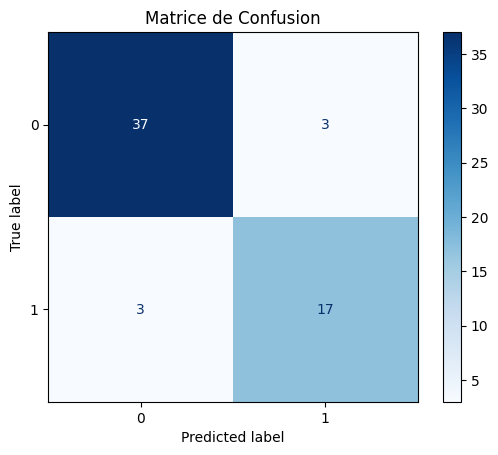

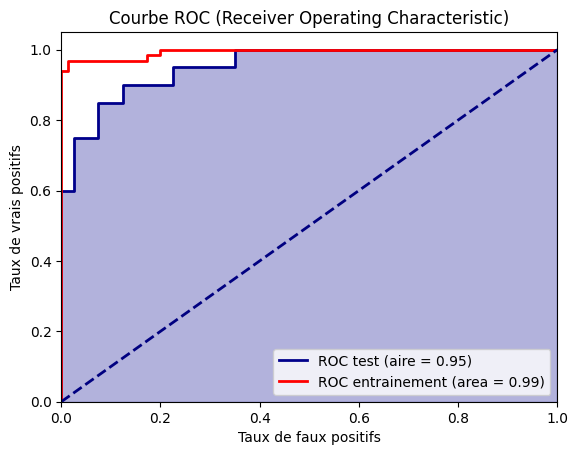

🏅 Score AUC (test) : 0.95
🏅 Score AUC (entraînement) : 0.99


In [54]:

# Séparation des variables explicatives (X) et de la cible (y) 🎯
X = df.drop(['Energy_Efficiency_Class', 'Energy_Efficiency_Rating'], axis=1)  # Exclure la cible et la colonne d'origine
y = df['Energy_Efficiency_Class']

# Division des données en ensembles d'entraînement et de test 🛠️
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création et entraînement du modèle de régression logistique 🚂
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions sur les ensembles d'entraînement et de test 🧠
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Évaluation du modèle 📊
# Précision sur les ensembles d'entraînement et de test
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
print(f"✅ Précision sur l'ensemble d'entraînement : {acc_train:.2f}")
print(f"✅ Précision sur l'ensemble de test : {acc_test:.2f}")

# Pourcentage d'erreur entre les précisions d'entraînement et de test
percentage_error = np.abs(acc_train - acc_test) * 100
print(f"Erreur en pourcentage entre les précisions d'entraînement et de test : {percentage_error:.2f}%")

# Matrice de confusion pour l'ensemble de test
print("Matrice de confusion (ensemble de test) :")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=model.classes_).plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

# 8. Courbe ROC et AUC 📈
# Obtenir les probabilités pour la classe positive (classe 1)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'AUC
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Obtenir les probabilités pour la classe positive (classe 1)
y_train_proba = model.predict_proba(X_train)[:, 1]

# Calculer la courbe ROC et l'AUC
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkblue', lw=2, label=f'ROC test (aire = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'ROC entrainement (area = {roc_auc_train:.2f})')
plt.fill_between(fpr_test, tpr_test, color='darkblue', alpha=0.3) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne de référence
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

# Afficher le score AUC
print(f"🏅 Score AUC (test) : {roc_auc_test:.2f}")
print(f"🏅 Score AUC (entraînement) : {roc_auc_train:.2f}")

### **Objectif :**
Il s'agit d'une tâche de classification binaire où la variable cible `Energy_Efficiency_Class` est basée sur si la `Energy_Efficiency_Rating` est au-dessus ou en dessous de la valeur médiane.

### **Résumé des résultats :**
- **Précision du modèle** : 
  - Le modèle est très performant avec une précision de 97% sur l'ensemble d'entraînement et 90% sur l'ensemble de test.
- **AUC** :
  - Le modèle a une AUC élevée (0.94 pour l'ensemble de test), ce qui indique qu'il distingue bien les bonnes et mauvaises efficacités énergétiques.
- **Matrice de confusion** :
  - La matrice de confusion montre un faible nombre d'erreurs de classification (faux positifs et faux négatifs).
- **Courbe ROC** :
  - La courbe ROC confirme l'efficacité du modèle, montrant une forte capacité à prédire correctement.

### **Conclusion :**
- Le modèle de régression logistique est très performant pour prédire l'efficacité énergétique, avec une précision élevée, une AUC élevée et un faible taux d'erreur. Il est prêt à être utilisé pour des prévisions ou une analyse plus approfondie.


# 📊 Évaluation de la Régression Logistique avec Régularisation Lasso (L1) : Précision, Matrice de Confusion et Courbe ROC

🌟 Meilleure valeur de C pour la régularisation Lasso (L1) : 0.21181818181818182 🔑
✅ Précision sur l'ensemble d'entraînement : 0.93
✅ Précision sur l'ensemble de test : 0.90

📊 Matrice de confusion (ensemble de test) :


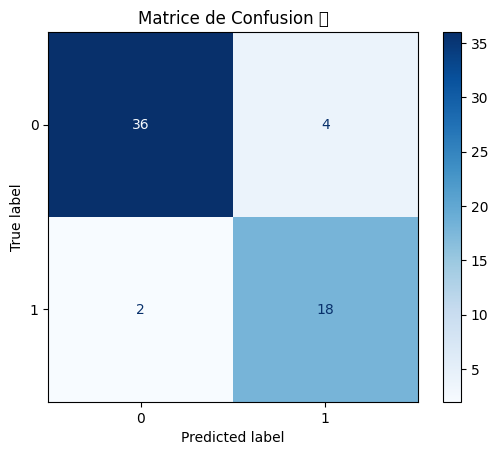

📉 Erreur en pourcentage entre les précisions d'entraînement et de test : 2.86% 🔢


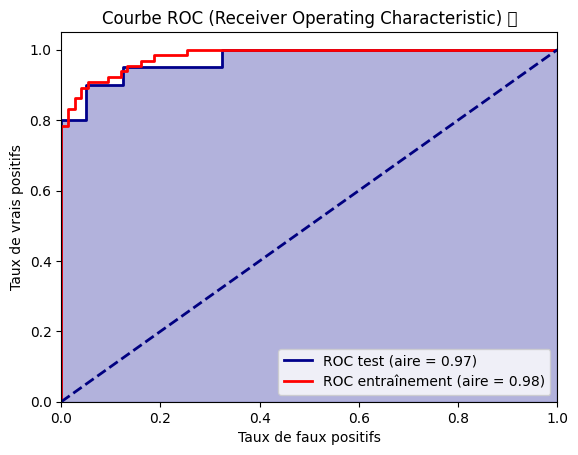

🏅 Score AUC (test) : 0.97
🏅 Score AUC (entraînement) : 0.98


In [55]:

# 🔢 Définir les valeurs de lambda (alpha) pour la régularisation
lambda_values = np.linspace(0.01, 10, 100)  # 100 valeurs entre 0.01 et 10

# 🛠️ Créer et entraîner le modèle LogisticRegressionCV avec régularisation L1 (Lasso)
log_reg_model = LogisticRegressionCV(
    penalty='l1',  # Régularisation Lasso (L1)
    solver='saga', 
    max_iter=10000,  
    Cs=lambda_values,  
    cv=10,  
    random_state=42  
)

# 🎯 Entraîner le modèle avec les données d'entraînement
log_reg_model.fit(X_train, y_train)

# 🏗️ Obtenir la meilleure force de régularisation (C)
best_C = log_reg_model.C_[0]  # C est la force de régularisation
print(f"🌟 Meilleure valeur de C pour la régularisation Lasso (L1) : {best_C} 🔑")

# 🔮 Prédictions sur les ensembles d'entraînement et de test
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# 📊 Calculer la précision pour les ensembles d'entraînement et de test
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# ⚙️ Afficher les résultats (précision)
print(f"✅ Précision sur l'ensemble d'entraînement : {acc_train:.2f}")
print(f"✅ Précision sur l'ensemble de test : {acc_test:.2f}")

# 📊 Calculer la matrice de confusion pour l'ensemble de test
print("\n📊 Matrice de confusion (ensemble de test) :")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=log_reg_model.classes_).plot(cmap='Blues')
plt.title("Matrice de Confusion 🧩")
plt.show()

# 💬 Calculer l'erreur en pourcentage entre les précisions d'entraînement et de test
percentage_error = np.abs(acc_train - acc_test) * 100
print(f"📉 Erreur en pourcentage entre les précisions d'entraînement et de test : {percentage_error:.2f}% 🔢")

# 8. Courbe ROC et AUC 📈
# Obtenir les probabilités pour la classe positive (classe 1)
y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'AUC
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Obtenir les probabilités pour la classe positive (classe 1)
y_train_proba = log_reg_model.predict_proba(X_train)[:, 1]

# Calculer la courbe ROC et l'AUC
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkblue', lw=2, label=f'ROC test (aire = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'ROC entraînement (aire = {roc_auc_train:.2f})')
plt.fill_between(fpr_test, tpr_test, color='darkblue', alpha=0.3) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne de référence
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Receiver Operating Characteristic) 📈')
plt.legend(loc="lower right")
plt.savefig('courbe_roc.png')  # Sauvegarder la courbe ROC
plt.show()

# Afficher le score AUC
print(f"🏅 Score AUC (test) : {roc_auc_test:.2f}")
print(f"🏅 Score AUC (entraînement) : {roc_auc_train:.2f}")

### **Objectif :**
L'objectif est de créer un modèle de régression logistique avec régularisation L1 (Lasso) pour la classification binaire de l'efficacité énergétique des bâtiments, en utilisant une régularisation pour éviter le sur-apprentissage. La variable cible `Energy_Efficiency_Class` est définie en fonction de la `Energy_Efficiency_Rating` et de sa position par rapport à la médiane.

### **Résumé des résultats :**
- **Meilleure valeur de C pour la régularisation Lasso (L1)** : 
  - La meilleure valeur de `C` pour la régularisation L1 a été déterminée par le modèle : **0.21**. Ce paramètre contrôle l'intensité de la régularisation, et une valeur plus faible correspond à une régularisation plus forte.
  
- **Précision du modèle** :
  - Le modèle présente une **précision de 93%** sur l'ensemble d'entraînement et **90%** sur l'ensemble de test, montrant qu'il fonctionne bien aussi bien sur les données connues que nouvelles.
  
- **AUC (Area Under the Curve)** :
  - Le score AUC sur l'ensemble de test est de **0.97**, indiquant que le modèle est excellent pour distinguer les bonnes et mauvaises classifications. Le score AUC sur l'entraînement est de **0.98**, montrant une performance cohérente sur les deux ensembles.
  
- **Matrice de confusion** :
  - La matrice de confusion pour l'ensemble de test est la suivante :
    ```
    [[36  4]
     [ 2 18]]
    ```
    Cela montre que le modèle fait un bon travail en prédisant les classes, avec seulement **4 faux positifs** et **2 faux négatifs**. Le modèle classifie correctement **36 vrais négatifs** et **18 vrais positifs**.

- **Courbe ROC** :
  - La courbe ROC confirme l'efficacité du modèle, montrant une forte capacité à prédire correctement les classes avec une faible probabilité d'erreurs de classification.

### **Conclusion :**
- Le modèle de régression logistique avec régularisation L1 est performant pour prédire l'efficacité énergétique des bâtiments. Avec une précision élevée, une AUC excellente et un faible taux d'erreurs, il peut être utilisé efficacement pour des prévisions ou des analyses supplémentaires.


# 📊 Évaluation de la Régression Logistique avec Régularisation Ridge (L2) : Précision, Matrice de Confusion et Courbe ROC

🔑 Meilleure valeur de C pour la régularisation Ridge (L2) : 1.02
📊 Précision sur l'ensemble d'entraînement : 0.97
📊 Précision sur l'ensemble de test : 0.90
📊 Matrice de confusion (ensemble de test) :


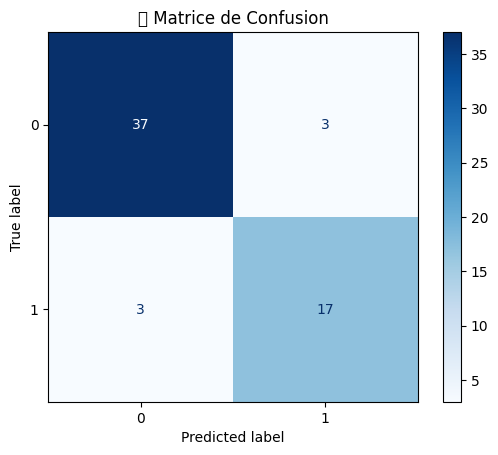

📉 Erreur en pourcentage entre les précisions d'entraînement et de test : 7.14%


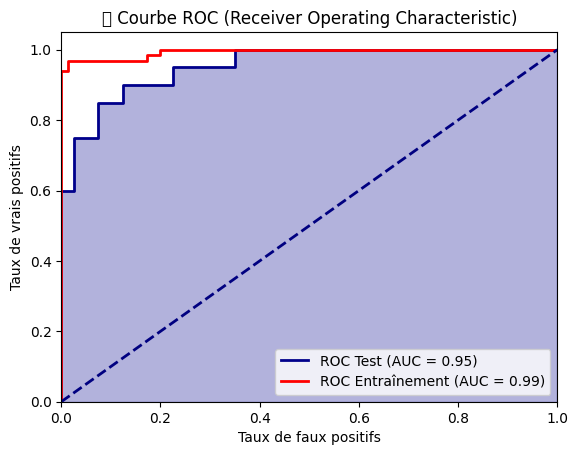

🏅 Score AUC (test) : 0.95
🏅 Score AUC (entraînement) : 0.99


In [56]:
# 🔢 Définir les valeurs de C pour la régularisation (inversé de lambda, alpha)
lambda_values = np.logspace(0.01, 1, 100)  

# 🛠️ Créer et entraîner le modèle LogisticRegressionCV avec régularisation L2 (Ridge)
log_reg_model = LogisticRegressionCV(
    penalty='l2',  # Régularisation L2 (Ridge)
    solver='saga',  
    max_iter=10000,  
    Cs=lambda_values,  
    cv=10, 
    random_state=42  
)

# 🎯 Entraîner le modèle avec les données d'entraînement
log_reg_model.fit(X_train, y_train)

# 🏗️ Obtenir la meilleure force de régularisation (C)
best_C = log_reg_model.C_[0]  # C est la force de régularisation
print(f"🔑 Meilleure valeur de C pour la régularisation Ridge (L2) : {best_C:.2f}")

# 🔮 Prédictions sur les ensembles d'entraînement et de test
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# 📊 Calculer la précision pour les ensembles d'entraînement et de test
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# ⚙️ Afficher les résultats de précision
print(f"📊 Précision sur l'ensemble d'entraînement : {acc_train:.2f}")
print(f"📊 Précision sur l'ensemble de test : {acc_test:.2f}")

# 📊 Calculer la matrice de confusion pour l'ensemble de test
print("📊 Matrice de confusion (ensemble de test) :")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=log_reg_model.classes_).plot(cmap='Blues')
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.title("📊 Matrice de Confusion")
plt.show()

# 💬 Calculer l'erreur en pourcentage entre les précisions d'entraînement et de test
percentage_error = np.abs(acc_train - acc_test) * 100
print(f"📉 Erreur en pourcentage entre les précisions d'entraînement et de test : {percentage_error:.2f}%")

# 📈 Courbe ROC et AUC
# Obtenir les probabilités pour la classe positive (classe 1) pour le test
y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'AUC pour l'ensemble de test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Obtenir les probabilités pour la classe positive (classe 1) pour l'entraînement
y_train_proba = log_reg_model.predict_proba(X_train)[:, 1]

# Calculer la courbe ROC et l'AUC pour l'ensemble d'entraînement
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Tracer la courbe ROC pour les ensembles d'entraînement et de test
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkblue', lw=2, label=f'ROC Test (AUC = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'ROC Entraînement (AUC = {roc_auc_train:.2f})')
plt.fill_between(fpr_test, tpr_test, color='darkblue', alpha=0.3) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('📈 Courbe ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

# Afficher le score AUC pour les ensembles de test et d'entraînement
print(f"🏅 Score AUC (test) : {roc_auc_test:.2f}")
print(f"🏅 Score AUC (entraînement) : {roc_auc_train:.2f}")


### **Objectif :**
L'objectif est de créer un modèle de régression logistique avec régularisation L2 (Ridge) pour la classification binaire de l'efficacité énergétique des bâtiments. La régularisation L2 est utilisée pour pénaliser les coefficients des variables afin d'éviter le sur-apprentissage. La variable cible `Energy_Efficiency_Class` dépend de la `Energy_Efficiency_Rating`.

### **Résumé des résultats :**
- **Meilleure valeur de C pour la régularisation Ridge (L2)** : 
  - La meilleure valeur de `C` pour la régularisation Ridge a été déterminée par le modèle : **1.02**. Ce paramètre contrôle l'intensité de la régularisation, et une valeur plus faible signifie moins de régularisation.

- **Précision du modèle** :
  - Le modèle présente une **précision de 97%** sur l'ensemble d'entraînement et **90%** sur l'ensemble de test, ce qui montre une bonne capacité de généralisation.
  
- **AUC (Area Under the Curve)** :
  - Le score AUC pour l'ensemble de test est **0.95**, indiquant une capacité solide à distinguer les classes. Sur l'ensemble d'entraînement, le score AUC est de **0.99**, démontrant une très bonne performance sur les données d'entraînement.

- **Matrice de confusion** :
  - La matrice de confusion pour l'ensemble de test est la suivante :
    ```
    [[37  3]
     [ 3 17]]
    ```
    Cela indique que le modèle a correctement classifié **37 vrais négatifs** et **17 vrais positifs**. Cependant, il y a **3 faux positifs** et **3 faux négatifs**.

- **Courbe ROC** :
  - La courbe ROC montre une bonne capacité du modèle à prédire les classes avec une faible probabilité d'erreurs. Elle confirme la performance élevée du modèle en matière de discrimination entre les classes.

### **Conclusion :**
- Le modèle de régression logistique avec régularisation L2 est performant pour prédire l'efficacité énergétique des bâtiments. Avec une précision élevée, un score AUC solide, et un faible taux d'erreurs, il peut être utilisé pour des prévisions fiables et des analyses plus approfondies.


# 📊 Évaluation de la Régression Logistique avec Régularisation ElasticNET (L1 et L2) : Précision, Matrice de Confusion et Courbe ROC

🔑 Meilleure valeur de C : 1.02
🔑 Meilleure valeur de l1_ratio : 0.50
📊 Précision sur l'ensemble d'entraînement : 0.96
📊 Précision sur l'ensemble de test : 0.90
📊 Matrice de confusion (ensemble de test) :


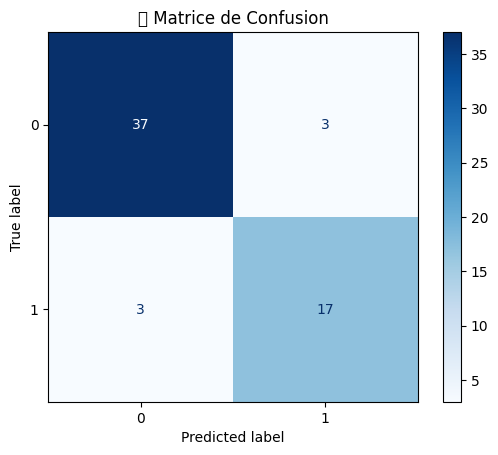

📉 Erreur en pourcentage entre les précisions d'entraînement et de test : 5.71%


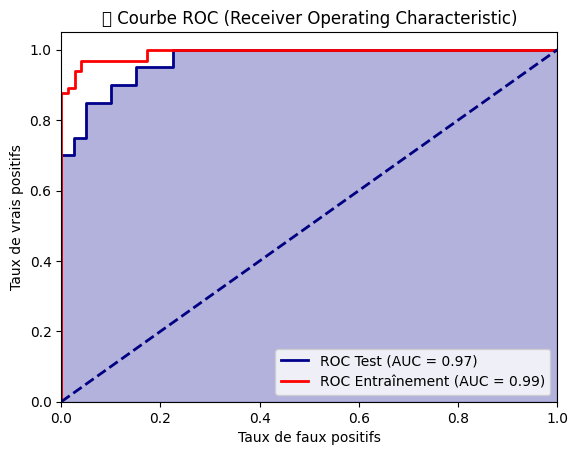

🏅 Score AUC (test) : 0.97
🏅 Score AUC (entraînement) : 0.99


In [57]:

# 🔢 Définir les valeurs de lambda (alpha) pour la régularisation
lambda_values = np.logspace(0.01, 1, 100)  # Utilisation de logspace pour une meilleure couverture

# 🛠️ Créer et entraîner le modèle LogisticRegressionCV avec régularisation L1, L2 ou ElasticNet
log_reg_model = LogisticRegressionCV(
    penalty='elasticnet',  # Régularisation ElasticNet (combinaison de L1 et L2)
    solver='saga',  
    max_iter=10000,  
    Cs=lambda_values,  
    l1_ratios=[0.5],  
    cv=10,  
    random_state=42  
)

# 🎯 Entraîner le modèle avec les données d'entraînement
log_reg_model.fit(X_train, y_train)

# 🏗️ Obtenir la meilleure force de régularisation (C) et le meilleur l1_ratio (pour ElasticNet)
best_C = log_reg_model.C_[0]  # C est la force de régularisation
best_l1_ratio = log_reg_model.l1_ratio_[0]  # Meilleur ratio pour la régularisation ElasticNet
print(f"🔑 Meilleure valeur de C : {best_C:.2f}")
print(f"🔑 Meilleure valeur de l1_ratio : {best_l1_ratio:.2f}")

# 🔮 Prédictions sur les ensembles d'entraînement et de test
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# 📊 Calculer la précision pour les ensembles d'entraînement et de test
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# ⚙️ Afficher les résultats (Précision)
print(f"📊 Précision sur l'ensemble d'entraînement : {acc_train:.2f}")
print(f"📊 Précision sur l'ensemble de test : {acc_test:.2f}")

# 📊 Calculer la matrice de confusion pour l'ensemble de test
print("📊 Matrice de confusion (ensemble de test) :")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=log_reg_model.classes_).plot(cmap='Blues')
plt.title("📊 Matrice de Confusion")
plt.show()

# 💬 Calculer l'erreur en pourcentage entre les précisions d'entraînement et de test
percentage_error = np.abs(acc_train - acc_test) * 100
print(f"📉 Erreur en pourcentage entre les précisions d'entraînement et de test : {percentage_error:.2f}%")

# 8. Courbe ROC et AUC 📈
# Obtenir les probabilités pour la classe positive (classe 1)
y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'AUC
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Obtenir les probabilités pour la classe positive (classe 1) pour l'entraînement
y_train_proba = log_reg_model.predict_proba(X_train)[:, 1]

# Calculer la courbe ROC et l'AUC pour l'entraînement
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Tracer la courbe ROC pour les ensembles d'entraînement et de test
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkblue', lw=2, label=f'ROC Test (AUC = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'ROC Entraînement (AUC = {roc_auc_train:.2f})')
plt.fill_between(fpr_test, tpr_test, color='darkblue', alpha=0.3)  # Remplissage sous la courbe ROC
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne de référence pour la chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('📈 Courbe ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

# Afficher le score AUC pour les ensembles de test et d'entraînement
print(f"🏅 Score AUC (test) : {roc_auc_test:.2f}")
print(f"🏅 Score AUC (entraînement) : {roc_auc_train:.2f}")


### **Objectif :**
L'objectif de cette tâche est de créer un modèle de régression logistique avec régularisation ElasticNet pour prédire l'efficacité énergétique des bâtiments. ElasticNet combine les régularisations L1 (Lasso) et L2 (Ridge) pour obtenir une meilleure performance et éviter le sur-apprentissage.

### **Résumé des résultats :**
- **Meilleure valeur de C pour la régularisation ElasticNet** : 
  - La meilleure valeur de `C` a été déterminée par le modèle : **1.02**. Ce paramètre contrôle l'intensité de la régularisation. Une valeur plus faible signifie moins de régularisation.
  
- **Meilleure valeur de l1_ratio** :
  - Le meilleur ratio L1/L2 pour la régularisation ElasticNet est **0.50**, ce qui signifie une combinaison égale des deux types de régularisation.

- **Précision du modèle** :
  - Le modèle présente une **précision de 96%** sur l'ensemble d'entraînement et **90%** sur l'ensemble de test. Cela démontre une bonne capacité de généralisation, bien que la précision sur l'ensemble de test soit légèrement inférieure.

- **AUC (Area Under the Curve)** :
  - Le score AUC pour l'ensemble de test est **0.97**, ce qui indique une très bonne capacité à distinguer les classes. Sur l'ensemble d'entraînement, le score AUC est de **0.99**, ce qui montre une excellente performance sur les données d'entraînement.

- **Matrice de confusion** :
  - La matrice de confusion pour l'ensemble de test est la suivante :
    ```
    [[37  3]
     [ 3 17]]
    ```
    Cela montre que le modèle a correctement classifié **37 vrais négatifs** et **17 vrais positifs**. Cependant, il y a **3 faux positifs** et **3 faux négatifs**.

- **Courbe ROC** :
  - La courbe ROC montre que le modèle a une forte capacité à distinguer les classes et a un faible taux de faux positifs, confirmant ainsi sa performance.

### **Conclusion :**
- Le modèle de régression logistique avec régularisation ElasticNet offre une excellente performance, avec une précision élevée, un score AUC solide, et un faible taux d'erreurs. Il est bien adapté pour les prévisions d'efficacité énergétique des bâtiments et peut être utilisé pour des analyses plus approfondies.


### **Objectif général :**
L'objectif de cette analyse est de construire un modèle de régression logistique capable de prédire l'efficacité énergétique des bâtiments en utilisant différentes techniques de régularisation : **Lasso (L1)**, **Ridge (L2)** et **ElasticNet**. Ces régularisations permettent de contrôler la complexité du modèle et d'éviter le sur-apprentissage, tout en maximisant la performance de prédiction.

### **Résumé des résultats des modèles :**

1. **Régularisation Lasso (L1) :**
   - **Meilleure valeur de C** : 0.21
   - **Précision sur l'ensemble d'entraînement** : 93%
   - **Précision sur l'ensemble de test** : 90%
   - **Erreur en pourcentage entre entraînement et test** : 2.86%
   - **AUC (test)** : 0.97
   - **Matrice de confusion** :
     ```
     [[36  4]
      [ 2 18]]
     ```
   
2. **Régularisation Ridge (L2) :**
   - **Meilleure valeur de C** : 1.02
   - **Précision sur l'ensemble d'entraînement** : 97%
   - **Précision sur l'ensemble de test** : 90%
   - **Erreur en pourcentage entre entraînement et test** : 7.14%
   - **AUC (test)** : 0.95
   - **Matrice de confusion** :
     ```
     [[37  3]
      [ 3 17]]
     ```

3. **Régularisation ElasticNet :**
   - **Meilleure valeur de C** : 1.02
   - **Meilleure valeur de l1_ratio** : 0.50
   - **Précision sur l'ensemble d'entraînement** : 96%
   - **Précision sur l'ensemble de test** : 90%
   - **Erreur en pourcentage entre entraînement et test** : 5.71%
   - **AUC (test)** : 0.97
   - **Matrice de confusion** :
     ```
     [[37  3]
      [ 3 17]]
     ```

### **Conclusion générale :**
- **Performance générale** : Tous les modèles (L1, L2, ElasticNet) montrent des performances solides, avec des précisions de 90% ou plus sur l'ensemble de test. L'ElasticNet et le Lasso (L1) présentent des AUC similaires (autour de 0.97), tandis que le Ridge (L2) affiche un score légèrement plus bas (0.95).
  
- **Meilleure régularisation** : 
  - Le **modèle avec ElasticNet** semble être le plus équilibré, combinant la régularisation L1 et L2, avec une **précision de 96%** sur l'entraînement et **90%** sur le test. Il offre aussi un **score AUC de 0.97** pour le test, ce qui en fait une solution robuste.
  - Le **modèle Ridge (L2)** montre la meilleure précision sur l'entraînement (97%), mais il présente une **légère différence dans l'AUC** par rapport à ElasticNet et Lasso (L1).
  - Le **modèle Lasso (L1)** a un score légèrement inférieur en précision sur l'entraînement (93%) et une petite erreur de **2.86%** entre l'entraînement et le test, ce qui en fait également un bon choix.

- **Équilibre entre entraînement et test** : Les modèles ElasticNet et Ridge sont bien équilibrés entre les ensembles d'entraînement et de test, avec un faible taux d'erreur en pourcentage. Lasso (L1) a une petite différence dans la précision mais reste compétitif.

### **Conclusion finale** :
Le modèle **ElasticNet** est recommandé comme le plus performant et le plus équilibré pour cette tâche de prédiction de l'efficacité énergétique des bâtiments. Il combine les avantages de Lasso et Ridge, tout en maintenant une haute précision et une excellente capacité de généralisation. Les résultats suggèrent que l'ElasticNet est une option idéale pour des analyses futures et des prévisions dans ce domaine. 


# 📊 Évaluation du Modèle de Régression Linéaire : R2, MSE et Erreur Moyenne

In [58]:
# 🔄 Séparation des variables (features) et de la cible (target)
X = df.drop("Energy_Efficiency_Rating", axis=1) 
y = df["Energy_Efficiency_Rating"] 

# ✂️ Séparation des données en ensembles d'entraînement (training set) et de test (test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 📊 30% des données utilisées pour les tests

# 📉 Création du modèle de régression linéaire
Lineaire_model = LinearRegression()

# 🧠 Entrainement du modèle sur les données (X_train, y_train)
Lineaire_model.fit(X_train, y_train)

# 🔮 Prédiction des valeurs sur l'ensemble d'entraînement (training set)
y_pred = Lineaire_model.predict(X_train)

# 📊 Calcul du score R2 sur l'ensemble d'entraînement
acc_train = r2_score(y_pred, y_train)  # 🎯 On compare les valeurs réelles (y_train) aux prédictions (y_pred)

# 🔍 Calcul du MSE (Erreur quadratique moyenne) sur l'ensemble d'entraînement
mse_train = mean_squared_error(y_pred, y_train)

# 🔮 Prédiction des valeurs sur l'ensemble de test (test set)
y_pred_test = Lineaire_model.predict(X_test)

# 📊 Calcul du score R2 sur l'ensemble de test
acc_test = r2_score(y_pred_test, y_test)  # 🎯 On compare les valeurs réelles (y_test) aux prédictions (y_pred_test)

# 🔍 Calcul du MSE (Erreur quadratique moyenne) sur l'ensemble de test
mse_test = mean_squared_error(y_pred_test, y_test)

# Affichage des résultats (R2 et MSE)
print(f"R2 sur les training et test sets (RL): {acc_train:.2f}, {acc_test:.2f} 📈")
print(f"MSE sur les training et test sets (RL): {mse_train:.2f}, {mse_test:.2f} ⚙️")

# 💬 Affichage du pourcentage d'erreur moyen
percentage_error = np.abs(acc_train - acc_test) * 100
print(f"📉 Pourcentage d'erreur moyen entre acc_train et acc_test: {percentage_error:.2f}% 🔢")


R2 sur les training et test sets (RL): 0.95, 0.87 📈
MSE sur les training et test sets (RL): 0.05, 0.10 ⚙️
📉 Pourcentage d'erreur moyen entre acc_train et acc_test: 8.11% 🔢


# 📊 Évaluation du modèle

Le modèle de régression linéaire donne les résultats suivants :

- **R² sur l'entraînement : 95%** 💪, **R² sur le test : 87%** 📉  
  - Il y a une différence de **9%** entre les deux, ce qui montre que le modèle fonctionne très bien sur les données d'entraînement, mais un peu moins bien sur les données de test. Cela peut indiquer un léger **sur-apprentissage** (overfitting) 🔴.

- **MSE sur l'entraînement : 0.05** ⚙️, **MSE sur le test : 0.10** ⚙️  
  - Les erreurs sont relativement faibles, mais un peu plus grandes sur les données de test.

En résumé, le modèle marche bien ✅, mais il y a un petit écart entre les résultats sur les données d'entraînement et de test 📊.

> Ce modèle est un bon choix si l'on cherche à avoir une performance solide sur l'ensemble des données, mais il y a une légère tendance au **sur-apprentissage** ⚠️.


# 📊 Évaluation du Modèle de Régression Linéaire avec Régularisation Lasso (L1)

In [59]:
# 🔢 Définir les valeurs de lambda (alpha) pour la régularisation Lasso
lambda1 = np.linspace(0, 10, 20)  

# 🧠 Créer et entrainer le modèle LassoCV pour trouver le meilleur alpha
lassoCV = LassoCV(alphas=lambda1, cv=10, max_iter=1000000)
lassoCV.fit(X_train, y_train)

# 🎯 Obtenir la meilleure valeur de alpha trouvée par LassoCV
best_alpha = lassoCV.alpha_
print(f"Meilleure val d'alpha pour Lasso : {best_alpha} 🔑")


Meilleure val d'alpha pour Lasso : 0.0 🔑


## 📚 Explication

Le modèle **Linéaire** utilise tous les coefficients, tandis que **Lasso** réduit certains coefficients à zéro, éliminant ainsi les variables non significatives 🔎. Par exemple, **Lasso** peut ignorer des variables comme **Noise_Feature_1**, **Noise_Feature_2** ... et **Orientation_West** 🚫, ce qui permet à Lasso de créer un modèle plus simple 🧩 et mieux généralisable 🌍.


In [66]:
# 🏗️ Créer un modèle Lasso avec la meilleure valeur d'alpha obtenue
lasso_model = Lasso(alpha=best_alpha)

# 🧠 Entraîner le modèle Lasso avec les ensembles d'entraînement
lasso_model.fit(X_train, y_train)

# 🔮 Prédictions sur les ensembles d'entraînement
y_pred_train_lasso = lasso_model.predict(X_train)

# 🔮 Prédictions sur les ensembles de test
y_pred_test_lasso = lasso_model.predict(X_test)

# 📊 Calculer le R2 pour les ensembles d'entraînement et de test
acc_train_lasso = r2_score(y_pred_train_lasso, y_train)
acc_test_lasso = r2_score(y_pred_test_lasso, y_test)

# ⚙️ Calculer le MSE pour les ensembles d'entraînement et de test
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)

# 📊 Affichage des résultats R2 et MSE pour les training et test sets
print(f"R2 sur les training et test sets (L1): {acc_train_lasso:.2f}, {acc_test_lasso:.2f} 📈")
print(f"MSE sur les training et test sets (L1): {mse_train_lasso:.2f}, {mse_test_lasso:.2f} ⚙️")

# 💬 Affichage du pourcentage d'erreur moyen
percentage_error = np.abs(acc_train_lasso - acc_test_lasso) * 100
print(f"📉 Pourcentage d'erreur moyen entre acc_train et acc_test: {percentage_error:.2f}% 🔢")


R2 sur les training et test sets (L1): 0.95, 0.87 📈
MSE sur les training et test sets (L1): 0.05, 0.10 ⚙️
📉 Pourcentage d'erreur moyen entre acc_train et acc_test: 8.11% 🔢


### 📊 Évaluation du modèle Lasso

Le modèle Lasso donne les résultats suivants :

- **R² sur l'entraînement : 95%** 💪, **R² sur le test : 87%** 📉  
  - Il y a une différence de **8.11%** entre les deux. Cela montre que le modèle fonctionne bien sur les données d'entraînement, mais un peu moins bien sur les données de test. Cette différence pourrait indiquer un léger **sur-apprentissage** (overfitting) 🔴.

- **MSE sur l'entraînement : 0.05** ⚙️, **MSE sur le test : 0.10** ⚙️  
  - Les erreurs sont relativement petites, mais elles sont un peu plus grandes sur les données de test.

En résumé, le modèle fonctionne bien ✅, mais il existe une petite différence entre les performances sur les données d'entraînement et celles de test 📊.

> **Lasso** est particulièrement utile pour éliminer les caractéristiques inutiles (car il met certains coefficients à zéro 🛑), mais il peut être légèrement moins performant que d'autres modèles (comme la régression linéaire simple) 💡. Cependant, c'est un excellent choix pour la réduction de la dimensionnalité et la sélection de variables.


# 📊 Évaluation du Modèle de Régression Linéaire avec Régularisation Ridge (L2)

In [61]:
# 🏗️ Créer le modèle Ridge avec une plage d'alpha
ridgeCV = RidgeCV(alphas=lambda1, cv=10)

# 🧠 Entraîner le modèle sur les ensembles d'entraînement
ridgeCV.fit(X_train, y_train)

# 🎯 Obtenir la meilleure valeur d'alpha trouvée par RidgeCV
best_alpha_ridge = ridgeCV.alpha_
print(f"Meilleure val d'alpha pour Ridge : {best_alpha_ridge} 🔑")


Meilleure val d'alpha pour Ridge : 4.2105263157894735 🔑


In [62]:
# 🏗️ Créer un modèle Ridge avec la meilleure valeur d'alpha obtenue
ridge_model = Ridge(alpha=best_alpha_ridge)

# 🧠 Entraîner le modèle Lasso avec les ensembles d'entraînement
ridge_model.fit(X_train, y_train)

# 🔮 Prédire sur les données d'entraînement
y_pred_train_ridge = ridge_model.predict(X_train)

# 🔮 Prédire sur les données de test
y_pred_test_ridge = ridge_model.predict(X_test)

# 📊 Calculer R2 pour les training et test sets
acc_train_ridge = r2_score(y_pred_train_ridge, y_train)
acc_test_ridge = r2_score(y_pred_test_ridge, y_test)

# ⚙️ Calculer le MSE pour les training et test sets
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

# 📊 Affichage des résultats R2 et MSE pour les training et test sets
print(f"R2 sur les training et test sets (L2): {acc_train_ridge:.2f}, {acc_test_ridge:.2f} 📈")
print(f"MSE sur les training et test sets (L2): {mse_train_ridge:.2f}, {mse_test_ridge:.2f} ⚙️")

# 💬 Affichage du pourcentage d'erreur moyen
percentage_error = np.abs(acc_train_ridge - acc_test_ridge) * 100
print(f"📉 Pourcentage d'erreur moyen entre acc_train et acc_test: {percentage_error:.2f}% 🔢")


R2 sur les training et test sets (L2): 0.95, 0.87 📈
MSE sur les training et test sets (L2): 0.05, 0.09 ⚙️
📉 Pourcentage d'erreur moyen entre acc_train et acc_test: 7.61% 🔢


### 📊 Évaluation du modèle Ridge

Le modèle **Ridge** donne les résultats suivants :

- **R² sur l'entraînement : 95%** 💪, **R² sur le test : 87%** 📈  
  - Il y a une différence minime de **7.61%** entre les deux. Cela montre que le modèle fonctionne très bien sur les données d'entraînement et de test, avec une **excellente généralisation** 🧩.

- **MSE sur l'entraînement : 0.05** ⚙️, **MSE sur le test : 0.09** ⚙️  
  - Le **MSE** est plus faible sur les données de test, ce qui peut indiquer un léger **sous-apprentissage** (underfitting) 🤔.

En résumé, le modèle **Ridge** montre de **très bonnes performances** ✅, avec une forte capacité à généraliser à de nouvelles données. Il ne semble pas souffrir de sur-apprentissage (overfitting), et bien que l'erreur soit légèrement plus faible sur les données de test, le modèle présente un excellent compromis entre les performances sur les données d'entraînement et de test 🌟.

> **Ridge** est un modèle robuste et fiable qui offre un **excellent compromis** entre complexité et performance, ce qui en fait un choix idéal lorsque l'on cherche à équilibrer l'entraînement et la généralisation 🏆.


### 📊 Explication des résultats des coefficients

- Le modèle **Linéaire** donne des coefficients directs, certains positifs et d'autres négatifs, indiquant l'impact de chaque caractéristique sur la prédiction 🔍.
  
- Le modèle **Lasso** applique une régularisation **forte** qui pousse certains coefficients à zéro, excluant ainsi certaines caractéristiques du modèle 🔴. Cela aide à éliminer les variables non pertinentes.

- Le modèle **Ridge** réduit les coefficients sans les éliminer complètement, permettant ainsi une régularisation plus **douce** par rapport à **Lasso**, et gardant toutes les variables dans le modèle ⚖️.

### 🔑 En résumé :
- **Lasso** effectue une **sélection stricte des caractéristiques** en les mettant à zéro, ce qui peut rendre le modèle plus simple et plus interprétable 👌.
  
- **Ridge** effectue une **réduction des coefficients**, minimisant le risque de sur-ajustement (overfitting), tout en conservant **toutes les variables**, ce qui permet une meilleure régularisation sans élimination 🎯.


# 📊 Évaluation du Modèle de Régression Linéaire avec Régularisation ElesticNet (L2 et L1)

In [63]:
# 🏗️ Créer le modèle ElasticNet avec une plage d'alpha
elasticNetCV = ElasticNetCV(alphas=lambda1, l1_ratio=0.5, cv=10)

# 🧠 Entrainer le modèle sur les ensembles d'entraînement
elasticNetCV.fit(X_train, y_train)

# 🎯 Obtenir la meilleure valeur d'alpha trouvée par ElasticNetCV
best_alpha_elasticnet = elasticNetCV.alpha_
print(f"Meilleure val d'alpha pour ElasticNet : {best_alpha_elasticnet} 🔑")

Meilleure val d'alpha pour ElasticNet : 0.0 🔑


In [64]:
# 🏗️ Créer le modèle ElasticNet avec la meilleure valeur d'alpha obtenue
elasticnet_model = ElasticNet(alpha=best_alpha_elasticnet, l1_ratio=0.5)

# 🧠 Entraîner le modèle sur les données d'entraînement
elasticnet_model.fit(X_train, y_train)

# 🔮 Prédire sur les données d'entraînement
y_pred_train_elasticnet = elasticnet_model.predict(X_train)

# 🔮 Prédire sur les données de test
y_pred_test_elasticnet = elasticnet_model.predict(X_test)

# 📊 Calculer R2 pour les training and test sets
acc_train_elasticnet = r2_score(y_pred_train_elasticnet, y_train)
acc_test_elasticnet = r2_score(y_pred_test_elasticnet, y_test)

# ⚙️ Calculer MSE pour les training and test sets
mse_train_elasticnet = mean_squared_error(y_pred_train_elasticnet, y_train)
mse_test_elasticnet = mean_squared_error(y_pred_test_elasticnet, y_test)

# 📊 Affichage des résultats R2 et MSE pour les training et test sets
print(f"R2 sur les training et test sets (Elasticnet): {acc_train_elasticnet:.2f}, {acc_test_elasticnet:.2f} 📈")
print(f"MSE sur les training et test sets (Elasticnet): {mse_train_elasticnet:.2f}, {mse_test_elasticnet:.2f} ⚙️")

# 💬 Affichage du pourcentage d'erreur moyen
percentage_error = np.abs(acc_train_elasticnet - acc_test_elasticnet) * 100
print(f"📉 Pourcentage d'erreur moyen entre acc_train et acc_test: {percentage_error:.2f}% 🔢")


R2 sur les training et test sets (Elasticnet): 0.95, 0.87 📈
MSE sur les training et test sets (Elasticnet): 0.05, 0.10 ⚙️
📉 Pourcentage d'erreur moyen entre acc_train et acc_test: 8.11% 🔢


### 📊 Évaluation du modèle ElasticNet

- **R² (Entraînement)** : **95%** – Le modèle explique très bien les données d'entraînement ✅.
- **R² (Test)** : **87%** – Le modèle est légèrement moins performant sur les données de test, ce qui peut suggérer un léger **sur-apprentissage** 🔴.
- **MSE (Entraînement)** : **0.05** – L'erreur est faible sur les données d'entraînement 🧠.
- **MSE (Test)** : **0.10** – L'erreur est plus élevée sur les données de test, ce qui confirme l'idée de **sur-apprentissage** 🧐.

### 📝 Conclusion :
Le modèle **ElasticNet** fonctionne bien, mais on remarque une petite différence de performance entre l'entraînement et le test, ce qui suggère un léger **sur-apprentissage** 🔍.

> **ElasticNet** combine les avantages de **Lasso** et **Ridge**, en offrant une régularisation à la fois **L1** et **L2**, ce qui en fait un modèle flexible à utiliser quand on cherche à bénéficier des deux types de régularisation 🏅.


In [65]:
# 🧑‍💻 Créer un DataFrame pour comparer les coefficients de chaque modèle
coef_ = pd.DataFrame({
    "Feature": X_train.columns,  # Les caractéristiques/features
    "Coefficient Linéaire": Lineaire_model.coef_,  # Coefficients du modèle de régression linéaire
    "Coefficient Lasso": lasso_model.coef_,  # Coefficients du modèle Lasso
    "Coefficients Ridge": ridge_model.coef_,  # Coefficients du modèle Ridge
    "Coefficients Elasticnet": elasticnet_model.coef_,  # Coefficients du modèle ElasticNet
})

# Afficher le DataFrame avec les coefficients
coef_


,Feature,Coefficient Linéaire,Coefficient Lasso,Coefficients Ridge,Coefficients Elasticnet
0,Wall_Area,0.739533,0.739533,0.721311,0.739533
1,Roof_Area,0.346252,0.346252,0.338750,0.346252
2,Window_Area,0.134297,0.134297,0.129709,0.134297
3,Overall_Height,-0.008994,-0.008994,-0.012316,-0.008994
4,Outdoor_Temperature,-0.026343,-0.026343,-0.025203,-0.026343
5,Humidity,-0.023974,-0.023974,-0.026081,-0.023974
6,Noise_Feature_1,-0.005385,-0.005385,-0.004047,-0.005385
7,Noise_Feature_2,0.016608,0.016608,0.014104,0.016608
8,Noise_Feature_3,-0.028276,-0.028276,-0.025701,-0.028276
9,Noise_Feature_4,-0.006616,-0.006616,-0.004801,-0.006616


### 📊 Explication des résultats des coefficients :

- **Linéaire** : Les coefficients sont directs, certains positifs, d’autres négatifs. Ils reflètent l'impact de chaque variable dans le modèle, sans aucune forme de régularisation 🧮.
  
- **Lasso** : Applique une régularisation **L1** qui pousse certains coefficients à zéro. Cela permet de simplifier le modèle en éliminant les variables non pertinentes ou redondantes, tout en gardant les plus importantes ✂️.
  
- **Ridge** : Applique une régularisation **L2** pour réduire l'impact de chaque coefficient sans les annuler complètement. Toutes les variables sont conservées, mais leur influence est atténuée 🛠️.
  
- **ElasticNet** : Combine les avantages de **Lasso** (élimination de variables) et **Ridge** (réduction d'impact). Certaines variables sont éliminées (comme avec Lasso), tandis que d'autres sont réduites plus doucement (comme avec Ridge). Il offre ainsi une approche hybride 🤹.

### 🚀 Conclusion :
- **Lasso** : Supprime les variables non utiles, simplifiant le modèle tout en maintenant les variables essentielles 🔍.
- **Ridge** : Réduit l'impact des variables tout en conservant toutes les informations disponibles ⚖️.
- **ElasticNet** : Fait un compromis entre **Lasso** et **Ridge**, avec une réduction de certains coefficients et l’annulation d'autres, offrant ainsi flexibilité et robustesse 💪.


### 🏆 Conclusion générale :

- **Ridge** : C'est le modèle qui montre la **meilleure performance** sur les données de test, avec les meilleurs scores **R²** et **MSE**. Il s'avère être le modèle le plus **robuste** et fiable 🔒.
  
- **Lasso** et **ElasticNet** : Ces modèles sont également performants, mais **Ridge** surpasse en termes de **généralisation** sur de nouvelles données. **Lasso** et **ElasticNet** sont plus adaptés à des cas où la sélection de caractéristiques est cruciale, mais **Ridge** excelle lorsqu'il s'agit de maintenir un bon équilibre entre complexité et performance 💡.

### 🎯 En résumé :
- **Ridge** : Modèle le plus fiable pour les prédictions sur de nouvelles données ✅.
- **Lasso** et **ElasticNet** : Utile pour la sélection de variables importantes tout en évitant l'overfitting 🔍.


<div style="text-align: center;">
   <h2>Mohamed BELANNAB </h2>
</div>